In [ ]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
x_train = (x_train).astype(np.float32) / 255
x_test = (x_test).astype(np.float32) / 255

# Base model

In [ ]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │       1,003,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,154,698 (4.40 MB)

 Trainable params: 1,154,698 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3893 - loss: 1.7190 - val_accuracy: 0.5803 - val_loss: 1.2020
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5987 - loss: 1.1360 - val_accuracy: 0.6192 - val_loss: 1.0974
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6730 - loss: 0.9431 - val_accuracy: 0.6312 - val_loss: 1.0607
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7195 - loss: 0.8211 - val_accuracy: 0.6501 - val_loss: 1.0126
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7469 - loss: 0.7352 - val_accuracy: 0.6453 - val_loss: 1.0642
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7769 - loss: 0.6480 - val_accuracy: 0.6515 - val_loss: 1.0551
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8068 - loss: 0.5669 - val_accuracy: 0.6502 - val_loss: 1.1299
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8305 - loss: 0.5026 - 

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plotting accuracy
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.ylim(0.5, 1) # Setting y-axis limit for accuracy
    plt.yticks(np.arange(0.5, 1.05, 0.05)) # Setting x-ticks from 0.5 to 1.0 with step 0.05
    plt.grid(True)
    plt.show()

    # Plotting loss
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

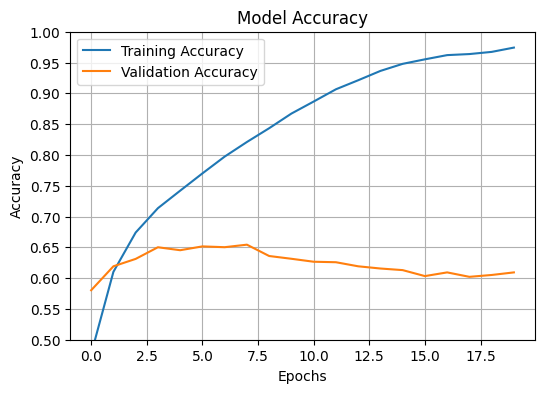

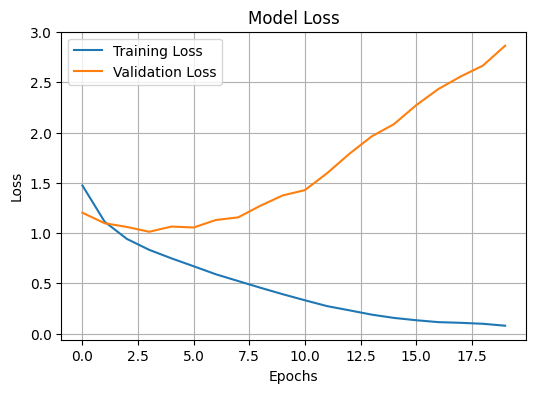

In [ ]:
plot_history(history)

# Stride

In [ ]:
# define model with stride
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=(2, 2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=(2, 2)))
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          62,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,898 (835.54 KB)

 Trainable params: 213,898 (835.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3559 - loss: 1.7844 - val_accuracy: 0.5236 - val_loss: 1.3340
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5472 - loss: 1.2797 - val_accuracy: 0.5516 - val_loss: 1.2644
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6060 - loss: 1.1263 - val_accuracy: 0.6121 - val_loss: 1.0987
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6438 - loss: 1.0215 - val_accuracy: 0.6205 - val_loss: 1.0704
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6739 - loss: 0.9381 - val_accuracy: 0.6340 - val_loss: 1.0500
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6976 - loss: 0.8795 - val_accuracy: 0.6495 - val_loss: 1.0040
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7111 - loss: 0.8252 - val_accuracy: 0.6529 - val_loss: 0.9907
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7339 - loss: 0.7704 - val_accuracy: 0.

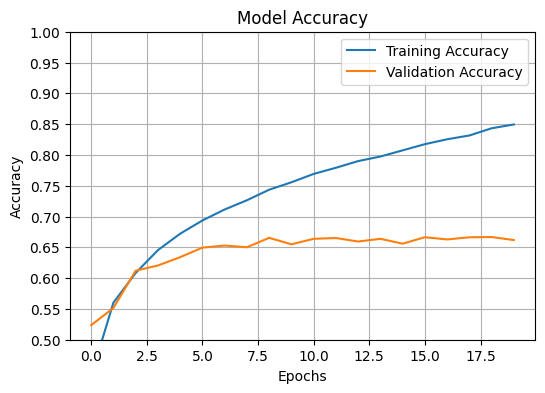

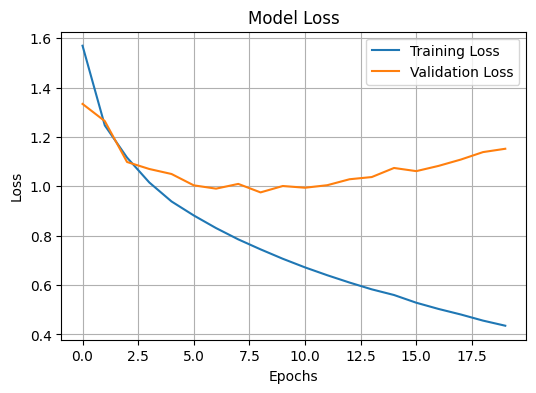

In [ ]:
plot_history(history)

# Pooling

In [ ]:
# define model with pooling
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          46,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,258 (770.54 KB)

 Trainable params: 197,258 (770.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3566 - loss: 1.7728 - val_accuracy: 0.5464 - val_loss: 1.2783
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5735 - loss: 1.2228 - val_accuracy: 0.6096 - val_loss: 1.1308
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6350 - loss: 1.0580 - val_accuracy: 0.6528 - val_loss: 1.0094
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6724 - loss: 0.9579 - val_accuracy: 0.6640 - val_loss: 0.9747
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6911 - loss: 0.8949 - val_accuracy: 0.6748 - val_loss: 0.9414
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7119 - loss: 0.8349 - val_accuracy: 0.6773 - val_loss: 0.9527
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7296 - loss: 0.7927 - val_accuracy: 0.6915 - val_loss: 0.9028
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7419 - loss: 0.7538 - val_ac

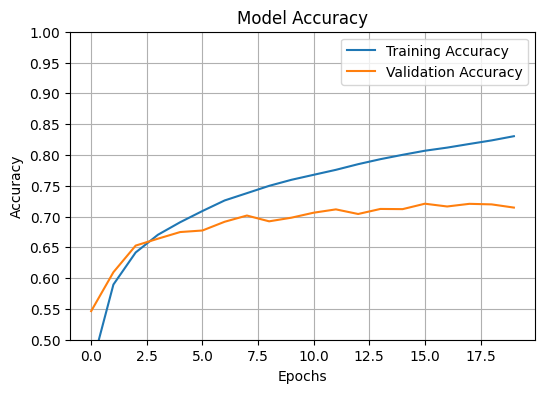

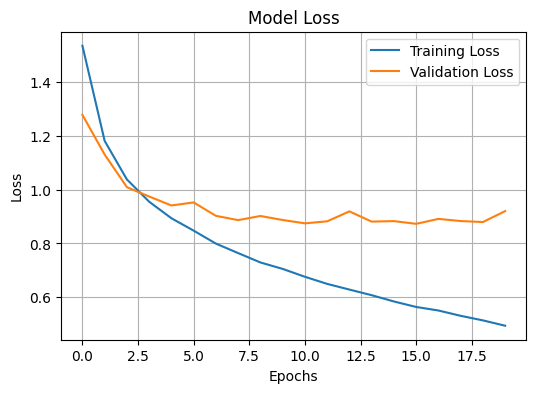

In [ ]:
plot_history(history)

In [ ]:
# plot confusion matrix
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)
